In [8]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random
import numpy

import matplotlib.pyplot as plt
import seaborn as sns


In [9]:

# problem constants:
ONE_MAX_LENGTH = 100  # length of bit string to be optimized

# Genetic Algorithm constants:
POPULATION_SIZE = 200
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 50
HALL_OF_FAME_SIZE = 10


# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)


In [10]:

toolbox = base.Toolbox()

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

c:\Users\NelsonWang\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\NelsonWang\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [11]:


# fitness calculation:
# compute the number of '1's in the individual
def oneMaxFitness(individual):
    return sum(individual),  # return a tuple


toolbox.register("evaluate", oneMaxFitness)

# genetic operators:mutFlipBit

# Tournament selection with tournament size of 3:
toolbox.register("select", tools.selTournament, tournsize=3)

# Single-point crossover:
toolbox.register("mate", tools.cxOnePoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)

In [12]:


# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", numpy.max)
stats.register("avg", numpy.mean)

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)



In [13]:

# perform the Genetic Algorithm flow with hof feature added:
population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                            ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

# print Hall of Fame info:
print("Hall of Fame Individuals = ", *hof.items, sep="\n")
print("Best Ever Individual = ", hof.items[0])


gen	nevals	max	avg   
0  	200   	61 	49.695
1  	200   	64 	53.365
2  	199   	66 	56.775
3  	200   	69 	59.78 
4  	199   	74 	62.23 
5  	199   	80 	64.7  
6  	199   	80 	67.715
7  	200   	82 	70.345
8  	198   	83 	73.31 
9  	200   	83 	75.905
10 	198   	83 	77.675
11 	199   	85 	78.935
12 	197   	86 	79.975
13 	198   	88 	81.195
14 	197   	87 	82.4  
15 	200   	90 	83.4  
16 	195   	90 	84.985
17 	195   	90 	86.18 
18 	196   	93 	87.255
19 	199   	94 	88.21 
20 	196   	95 	89.135
21 	197   	95 	90.095
22 	199   	94 	90.88 
23 	200   	96 	91.48 
24 	199   	96 	92.425
25 	199   	96 	93.055
26 	198   	97 	93.465
27 	197   	97 	93.595
28 	199   	97 	93.865
29 	199   	98 	94.12 
30 	198   	98 	94.54 
31 	198   	98 	95.045
32 	198   	98 	95.62 
33 	195   	99 	95.7  
34 	195   	99 	96.055
35 	199   	99 	96.29 
36 	197   	99 	96.47 
37 	197   	100	96.75 
38 	199   	100	97.24 
39 	199   	100	97.295
40 	198   	100	97.57 
41 	200   	100	97.69 
42 	199   	100	97.9  
43 	198   	100	98.12 
44 	199   

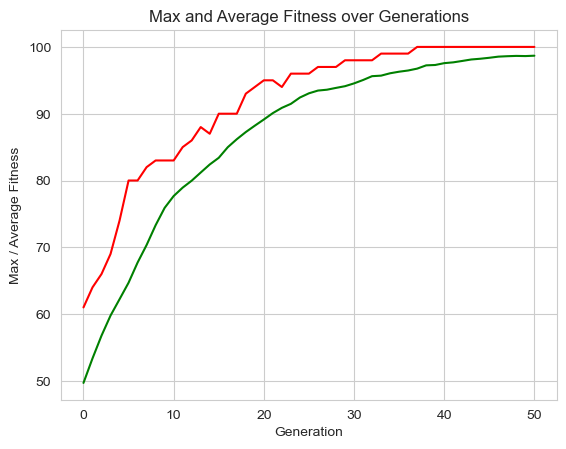

In [14]:

# extract statistics:
maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

# plot statistics:
sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average Fitness over Generations')

plt.show()